# Importing Dataset and basic analysis and cleaning

In [1]:
import pandas as pd
# Read the real news dataset
real = pd.read_csv("../Dataset/True.csv")

# Read the fake news dataset
fake = pd.read_csv("../Dataset/Fake.csv")

# Shape of real news dataset
print("Real news: ", real.shape)

# Shape of fake news dataset
print("Fake News: ", fake.shape)

# Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = [0] * len(real)
real.insert(4, "class", class0, True)

# Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = [1] * len(fake)
fake.insert(4, "class", class1, True)

# Concatenating fake news and real news into one total dataset
total = pd.concat([real, fake])
total = total.sample(frac=1)


Real news:  (21417, 4)
Fake News:  (23481, 4)


In [2]:
total.head(5)

,title,text,subject,date,class
19348,A North Korea nuclear test over the Pacific? L...,SEOUL/TOKYO (Reuters) - Detonating a nuclear-t...,worldnews,"September 22, 2017",0
7892,Trump Jr. Offers Up Revolting Praise Of Dad: ...,"Don Trump Jr., the privileged, wealthy son of ...",News,"February 24, 2016",1
7976,It Begins: Supreme Court Rejects Racially Ger...,"This the worst fear of Republicans, conservati...",News,"February 20, 2016",1
12177,Mexico enshrines army's role in drug war with ...,MEXICO CITY (Reuters) - Mexico s Congress on F...,worldnews,"December 15, 2017",0
14999,Freeport Indonesia mine access road reopened a...,JAKARTA (Reuters) - The Indonesian unit of Fre...,worldnews,"November 13, 2017",0


In [3]:
#shifting class to the end
col_to_move = total.pop('class')
total['class'] = col_to_move

#Extract only the values for title (input) and class (output)
data = total[['title','class','text']]
data.head()

,title,class,text
19348,A North Korea nuclear test over the Pacific? L...,0,SEOUL/TOKYO (Reuters) - Detonating a nuclear-t...
7892,Trump Jr. Offers Up Revolting Praise Of Dad: ...,1,"Don Trump Jr., the privileged, wealthy son of ..."
7976,It Begins: Supreme Court Rejects Racially Ger...,1,"This the worst fear of Republicans, conservati..."
12177,Mexico enshrines army's role in drug war with ...,0,MEXICO CITY (Reuters) - Mexico s Congress on F...
14999,Freeport Indonesia mine access road reopened a...,0,JAKARTA (Reuters) - The Indonesian unit of Fre...


Mean Length 80.11171989843646
Min Length 8
Max Length 286


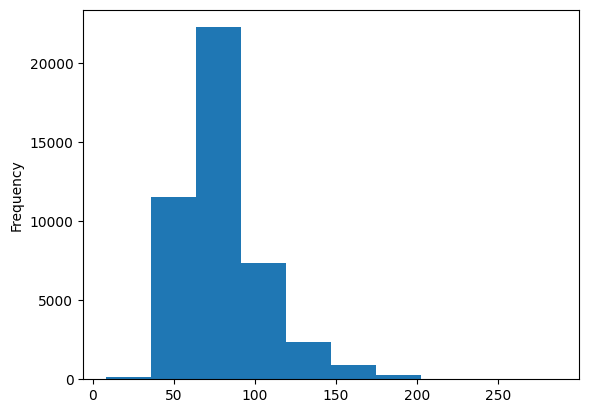

In [4]:

# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()


In [8]:
num_rows = (data['text'].str.len() > 3900).sum()
print('Number of rows with more than 8000 characters:', num_rows)

#Removing rows with more than 8000 characters
data = data[data['text'].str.len() < 3900]

Number of rows with more than 8000 characters: 1545


In [9]:
import string

#Lowercase letters
data['title'] = data['title'].str.lower()
data['text'] = data['text'].str.lower()
data.head()


#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)


#Loop through dataframe and remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text

# Apply to the DF series
data['title'] = data['title'].apply(removePunc)
data['text'] = data['text'].apply(removePunc)
data.head()

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


,title,class,text,stop_words_before
19348,a north korea nuclear test over the pacific lo...,0,"[S, E, O, U, L, /, T, O, K, Y, O, , (, R, e, ...",1679
7892,trump jr offers up revolting praise of dad ‘t...,1,"[D, n, , T, r, u, p, , J, r, ., ,, , h, e, ...",1062
7976,it begins supreme court rejects racially gerr...,1,"[T, h, , h, e, , w, r, , f, e, r, , f, , ...",672
12177,mexico enshrines armys role in drug war with d...,0,"[M, E, X, I, C, O, , C, I, T, Y, , (, R, e, ...",464
14999,freeport indonesia mine access road reopened a...,0,"[J, A, K, A, R, T, A, , (, R, e, u, e, r, ), ...",171


In [6]:
del class0, class1, col_to_move, fake, real, total,x

# Using NLTK

In [14]:
#Import nltk preprocessing library to convert text into a readable format
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

#Tokenize the string (create a list -> each index is a word)
#data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
#data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

#Define text lemmatization model (eg: walks will be changed to walk)
lemmatizer = WordNetLemmatizer()

#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)
data['text'] = data['text'].apply(lemma)

#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')

#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])

import matplotlib.pyplot as plt

# Calculate the number of stop words in each text before the operation
#data['stop_words_before'] = data['text'].apply(lambda x: len([i for i in x if i in stop]))

# Apply the function to remove stop words
data['text'] = data['text'].apply(lambda x: [i for i in x if i not in stop])

# Calculate the number of stop words in each text after the operation
#data['stop_words_after'] = data['text'].apply(lambda x: len([i for i in x if i in stop]))

# Plot the number of stop words before and after the operation
#data[['stop_words_before', 'stop_words_after']].plot(kind='bar', figsize=(12, 6))
#plt.ylabel('Number of stop words')
#plt.show()
#data.head()

Assign training data and testing data
titles = data['title']
labels = data['class']
OR direct assignment is done below
title_train = X_train, title_test = X_test, y_train = y_train, y_test = y_test as per previous knowledge

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Split data into training and testing dataset
title_train, title_test, y_train, y_test = train_test_split(data['title'], data['class'], test_size=0.2, random_state=1000)

# Model Download
Run only once.

'''
import tensorflow_hub as hub
import requests
import os
import tarfile

### Specify the URL of the model and the location to store it
model_url = "https://tfhub.dev/google/Wiki-words-250/2?tf-hub-format=compressed"
model_dir = "./"

### Download the model
response = requests.get(model_url, stream=True)
response.raise_for_status()

### Save the model to a .tar.gz file
model_file = os.path.join(model_dir, "model.tar.gz")
with open(model_file, "wb") as f:
    f.write(response.content)

### Extract the model from the .tar.gz file
with tarfile.open(model_file, "r:gz") as tar:
    tar.extractall(path=model_dir)

### Load the model from the local directory
embed = hub.load(model_dir)

# Model Configuration

In [ ]:
import tensorflow as tf
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenizing sentences into words
# title_train_tokenized = [word_tokenize(i) for i in title_train]

# Training the Word2Vec model
model = Word2Vec(sentences=title_train, vector_size=100, window=5, min_count=1, workers=4)

# To convert each word in a sentence to its word2vec embedding and average them:
indiv = []
for sentence in title_train:
  sentence_embedding = np.mean([model.wv[word] for word in sentence if word in model.wv.key_to_index], axis=0)
  indiv.append(sentence_embedding)

# Preprocess the sequences to account for different lengths of words
indiv = tf.keras.preprocessing.sequence.pad_sequences(indiv, dtype='float32', padding='post')

print(indiv.shape)

(35918, 100)


# Model Training
Eroors and solutions
1.
code: model.fit(indiv, y_train,validation_data=[title_test,y_test],epochs=10)
issue : ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).
solution 1: 
The validation_data argument in model.fit() should be a tuple in the form (x_val, y_val), where x_val is the validation input data and y_val is the validation target data.

Try changing your code to: model.fit(indiv, y_train, validation_data=(title_test, y_test), epochs=10)

Before this line, ensure that title_test and y_test are Numpy arrays or TensorFlow tensors. You can convert a list to a Numpy array using numpy.array(). For example: 
import numpy as np

title_test = np.array(title_test)
y_test = np.array(y_test)

solution implemented : Numpyarry input need to be converted to tensor

In [ ]:
import tensorflow as tf
import keras

import tensorflow as tf
print(tf.__version__)
print(keras.__file__)

2.16.1
c:\Users\johnd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\__init__.py


In [ ]:
import numpy as np
from sequence import pad_sequences

# Assuming title_train and title_test are lists of sentences where each sentence is a list of words
# Pad sequences for consistent length
title_train_padded = pad_sequences(title_train)
title_test_padded = pad_sequences(title_test)

# Reshape the padded arrays
title_train_reshaped = np.reshape(title_train_padded, (title_train_padded.shape[0], -1))  # -1 infers the correct shape automatically
title_test_reshaped = np.reshape(title_test_padded, (title_test_padded.shape[0], -1))

# Convert the reshaped arrays to Tensor arrays
title_train_tensor = tf.convert_to_tensor(title_train_reshaped, dtype=tf.float32)
title_test_tensor = tf.convert_to_tensor(title_test_reshaped, dtype=tf.float32)

# Assuming y_train and y_test are already defined and are numpy arrays
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

ValueError: invalid literal for int() with base 10: '’'

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

def compile_model(learning_rate):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.2))
    model.add(tf.keras.layers.LSTM(50, dropout=0.2))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(40, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

def train_model(model, indiv, y_train, title_test, y_test, epochs, learning_rate, batch_size):
    try:
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss="binary_crossentropy",
                      metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3)

        history = model.fit(indiv, y_train, validation_data=(title_test, y_test), epochs=epochs, batch_size=batch_size)

        return history

    except Exception as e:
        print(f"Error occurred during training: {e}")
        return None

def plot_metrics(history):
    if history is not None:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.tight_layout()
        plt.show()
    else:
        print("Cannot plot metrics as history is None.")

# Sequential model has a 50 cell LSTM layer before Dense layers
model = compile_model(learning_rate=1e-3)

# Converting input data to Tensor array
title_train_tensor = tf.convert_to_tensor(title_train)
title_test_tensor = tf.convert_to_tensor(title_test)
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

# Train model on 10 epochs / 
history = train_model(model, title_train_tensor, y_train_tensor, title_test_tensor, y_test_tensor, epochs=10, learning_rate=1e-3, batch_size=32)

# Plot training & validation accuracy values
plot_metrics(history)


ValueError: setting an array element with a sequence.